<a href="https://colab.research.google.com/github/hashimminhas/ML-model/blob/main/English_modle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

loading the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Preprocessed Fake Reviews Detection Dataset.csv to Preprocessed Fake Reviews Detection Dataset.csv


In [ ]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)

Preprocessing (Removing stop words)

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


Spliting the dataset into test and Train

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'], df['label'], test_size=0.35, random_state=42)


Model Selection (Creating pipeline for different algorithms)

XGBoost Algorithm

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', XGBClassifier())  # Using XGBoost classifier
])

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
pipeline.fit(review_train, label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7841d2eb5360>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_type..._policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
predictions = pipeline.predict(review_test)


In [ ]:
print('Classification Report:')
print(classification_report(label_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7047
           1       0.85      0.83      0.84      7104

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151



In [ ]:

print('Confusion Matrix:')
print(confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions) * 100, 2)) + '%')


Confusion Matrix:
[[6027 1020]
 [1226 5878]]
Accuracy Score: 0.8412833015334605
Model Prediction Accuracy: 84.13%


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())  # Using Random Forest classifier
])

In [ ]:
# Train the pipeline
pipeline.fit(review_train, label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7841d2eb5360>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Make predictions
predictions = pipeline.predict(review_test)


In [ ]:
# Evaluate the model
print('Classification Report:')
print(classification_report(label_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions) * 100, 2)) + '%')


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7047
           1       0.82      0.88      0.85      7104

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix:
[[5712 1335]
 [ 883 6221]]
Accuracy Score: 0.8432619602854922
Model Prediction Accuracy: 84.33%


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())  # Using SVM classifier
])

In [ ]:
# Train the pipeline
pipeline.fit(review_train, label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7841d2eb5360>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
# Make predictions
predictions = pipeline.predict(review_test)


In [ ]:

# Evaluate the model
print('Classification Report:')
print(classification_report(label_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(np.round(accuracy_score(label_test, predictions) * 100, 2)) + '%')


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7047
           1       0.90      0.86      0.88      7104

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix:
[[6347  700]
 [1011 6093]]
Accuracy Score: 0.8790898169740654
Model Prediction Accuracy: 87.91%


logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # Convert text to word count vectors
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('classifier', LogisticRegression())  # Logistic Regression classifier
])


In [ ]:
# Fit the pipeline on the training data
pipeline.fit(review_train, label_train)


Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
# Make predictions on the testing data
predictions = pipeline.predict(review_test)


In [ ]:
# Evaluate the model
print('Classification Report:')
print(classification_report(label_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(round(accuracy_score(label_test, predictions) * 100, 2)) + '%')


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7047
           1       0.90      0.85      0.87      7104

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix:
[[6342  705]
 [1040 6064]]
Accuracy Score: 0.876687159918027
Model Prediction Accuracy: 87.67%


Tunning with RandomizedSearchCV (only for XGB)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.5, 0.7, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 1.0],
}

In [ ]:
xgb_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', XGBClassifier(random_state=42))
])

In [ ]:
random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_grid, n_iter=4, scoring='accuracy', cv=5, verbose=1, random_state=42)


In [ ]:
random_search.fit(review_train, label_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('bow',
                                              CountVectorizer(analyzer=<function text_process at 0x7841d2eb5360>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=F...
                                                            random_state=42, ...))]),
                   n_iter=4,
                   param_distributions={'classifier__colsample_bytree': [0.5,
                                                                         0.7,
                                                                         1.0],
                                        'classifier__gamma': [0, 0.1, 0.2],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7],
                                        'classifier__min_child_weight': [1, 3,
                                                                         5],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__subsample': [0.5, 0.7,
                                                                  1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'classifier__subsample': 0.5, 'classifier__n_estimators': 300, 'classifier__min_child_weight': 3, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.7}
Best Score: 0.8354642313546423


In [ ]:
predictions = random_search.predict(review_test)


In [ ]:
print('Classification Report:')
print(classification_report(label_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(label_test, predictions))
print('Accuracy Score:', accuracy_score(label_test, predictions))
print('Model Prediction Accuracy:', str(round(accuracy_score(label_test, predictions) * 100, 2)) + '%')

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7047
           1       0.85      0.83      0.84      7104

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix:
[[6045 1002]
 [1226 5878]]
Accuracy Score: 0.8425552964454809
Model Prediction Accuracy: 84.26%


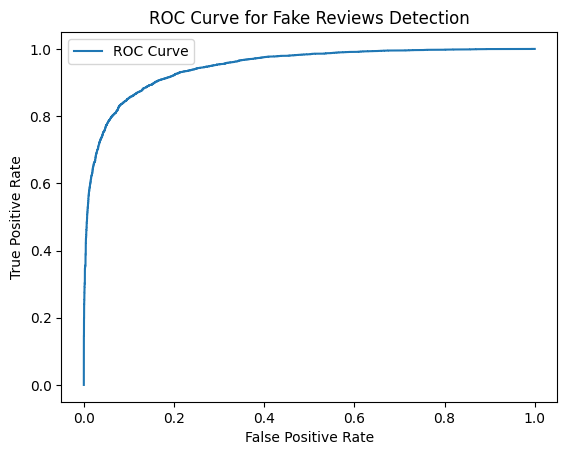

AUC Score: 0.9480286880111274


In [ ]:
# prompt: code for Roc curve and acu score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on the test data
predictions_proba = pipeline.predict_proba(review_test)

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(label_test, predictions_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fake Reviews Detection')
plt.legend()
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(label_test, predictions_proba[:, 1])

print('AUC Score:', auc_score)
